In [1]:
# Import dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import libraries
!pip install prophet


In [3]:
# Read in the csv data
df_doordash = pd.read_csv(
    "dash_adjusted_gp.csv",
    # index_col='Date',
    # parse_dates=True
).dropna()

In [ ]:
# View the information of the dataframe for the csv file
df_doordash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adjusted_gross_profit  7 non-null      object 
 1   q1_2022                7 non-null      float64
 2   q2_2022                7 non-null      float64
 3   q3_2022                7 non-null      float64
 4   q4_2022                7 non-null      float64
 5   q1_2023                7 non-null      float64
 6   q2_2023                7 non-null      float64
 7   q3_2023                7 non-null      float64
 8   q4_2023                7 non-null      float64
 9   q1_2024                7 non-null      float64
dtypes: float64(9), object(1)
memory usage: 688.0+ bytes


In [4]:
# View the data in the dataframe
df_doordash

,adjusted_gross_profit,q1_2022,q2_2022,q3_2022,q4_2022,q1_2023,q2_2023,q3_2023,q4_2023,q1_2024
0,Gross profit (millions dollars),662.00,686.000,714.000,762.000,921.000,951.000,962.000,1026.000,1129.000
1,Add: Depreciation and amortization related to ...,31.00,42.000,56.000,42.000,45.000,47.000,46.000,48.000,54.000
2,Add: Stock-based compensation expense and cert...,12.00,31.000,29.000,31.000,24.000,43.000,37.000,36.000,33.000
3,Add: Allocated overhead included in cost of re...,9.00,8.000,7.000,8.000,9.000,8.000,8.000,7.000,8.000
4,Add: Inventory write-off related to restructuring,0.00,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,Adjusted Gross Profit,714.00,769.000,806.000,843.000,999.000,1049.000,1053.000,1117.000,1224.000
6,Adjusted Gross Margin (percentages),0.49,0.478,0.474,0.464,0.491,0.492,0.487,0.485,0.487


# This section is analyzing the Gross Profit for each quarter from 2022 to the first quarter of 2024.

In [5]:
# Make a dataframe that only has the ending dates of the quarters along with the gross profit values
dates = ["2022-03-31","2022-06-30","2022-09-30","2022-12-31","2023-03-31","2023-06-30","2023-09-30","2023-12-31","2024-03-31"]
gross_profit = df_doordash.iloc[0][1:]
gross_profit_df = pd.DataFrame({"date":dates, "gross_profit":gross_profit})
gross_profit_df

,date,gross_profit
q1_2022,2022-03-31,662.0
q2_2022,2022-06-30,686.0
q3_2022,2022-09-30,714.0
q4_2022,2022-12-31,762.0
q1_2023,2023-03-31,921.0
q2_2023,2023-06-30,951.0
q3_2023,2023-09-30,962.0
q4_2023,2023-12-31,1026.0
q1_2024,2024-03-31,1129.0


In [6]:
# drop the index columns
gross_profit_df.reset_index(drop=True, inplace=True)
gross_profit_df

,date,gross_profit
0,2022-03-31,662.0
1,2022-06-30,686.0
2,2022-09-30,714.0
3,2022-12-31,762.0
4,2023-03-31,921.0
5,2023-06-30,951.0
6,2023-09-30,962.0
7,2023-12-31,1026.0
8,2024-03-31,1129.0


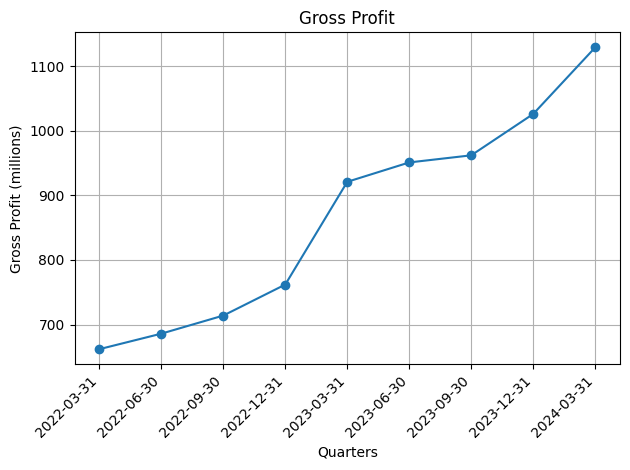

In [16]:
# plot of gross_profit_df
plt.plot(gross_profit_df['date'], gross_profit_df['gross_profit'], marker='o')
plt.title("Gross Profit")
plt.xlabel("Quarters")
plt.ylabel("Gross Profit (millions)")
plt.xticks(gross_profit_df['date'], rotation=45, ha='right')  # Rotate for readability if needed
plt.grid()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Label the columns ds and y so that the syntax is recognized by Prophet
gross_profit_df.columns = ["ds","y"]
gross_profit_df

,ds,y
0,2022-03-31,662.0
1,2022-06-30,686.0
2,2022-09-30,714.0
3,2022-12-31,762.0
4,2023-03-31,921.0
5,2023-06-30,951.0
6,2023-09-30,962.0
7,2023-12-31,1026.0
8,2024-03-31,1129.0


In [ ]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [ ]:
# Fit the time-series model.
m.fit(gross_profit_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1m9fd80/g3dw_3td.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1m9fd80/zpyvcdwd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39582', 'data', 'file=/tmp/tmpi1m9fd80/g3dw_3td.json', 'init=/tmp/tmpi1m9fd80/zpyvcdwd.json', 'output', 'file=/tmp/tmpi1m9fd80/prophet_model4nb30e3k/prophet_model-20240803023939.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:39:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 8 quarters (approx 2 years)
future_doordash = m.make_future_dataframe(periods=8, freq="q")

In [ ]:
# Make the predictions for the trend data using the DataFrame
forecast_doordash = m.predict(future_doordash)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


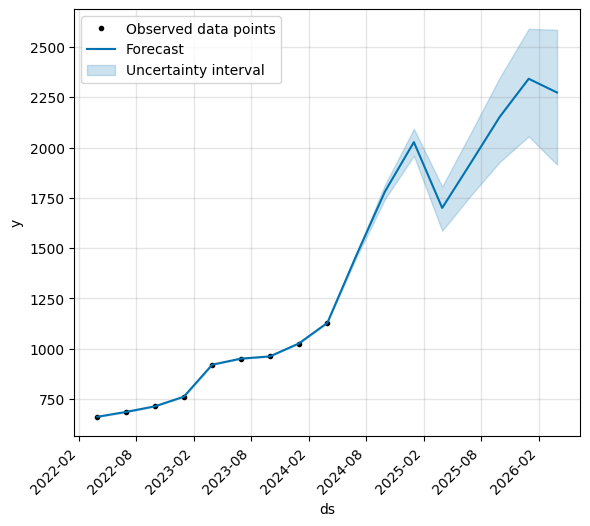

In [ ]:
# Plot the Prophet predictions for the gross profits data
m.plot(forecast_doordash, include_legend=True,figsize=(6,5))
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

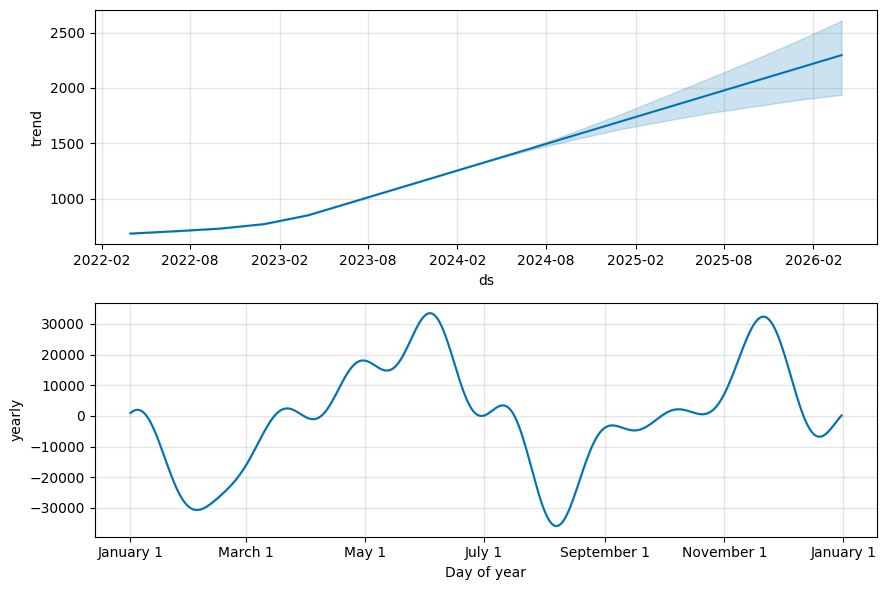

In [ ]:
# Reset the index in the forecast_doordash DataFrame
forecast_doordash = forecast_doordash.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_doordash DataFrame
fig1 = m.plot_components(forecast_doordash)

# This section is analyzing the Adjusted Gross Profit for each quarter from 2022 to the first quarter of 2024.

In [17]:
# Make a dataframe that only has the ending dates of the quarters along with the adjusted gross profit values
dates = ["2022-03-31","2022-06-30","2022-09-30","2022-12-31","2023-03-31","2023-06-30","2023-09-30","2023-12-31","2024-03-31"]
adj_gross_profit = df_doordash.iloc[5][1:]
adj_gross_profit_df = pd.DataFrame({"date":dates, "adjusted_gross_profit":adj_gross_profit})
adj_gross_profit_df

,date,adjusted_gross_profit
q1_2022,2022-03-31,714.0
q2_2022,2022-06-30,769.0
q3_2022,2022-09-30,806.0
q4_2022,2022-12-31,843.0
q1_2023,2023-03-31,999.0
q2_2023,2023-06-30,1049.0
q3_2023,2023-09-30,1053.0
q4_2023,2023-12-31,1117.0
q1_2024,2024-03-31,1224.0


In [18]:
# drop the index columns
adj_gross_profit_df.reset_index(drop=True, inplace=True)
adj_gross_profit_df

,date,adjusted_gross_profit
0,2022-03-31,714.0
1,2022-06-30,769.0
2,2022-09-30,806.0
3,2022-12-31,843.0
4,2023-03-31,999.0
5,2023-06-30,1049.0
6,2023-09-30,1053.0
7,2023-12-31,1117.0
8,2024-03-31,1224.0


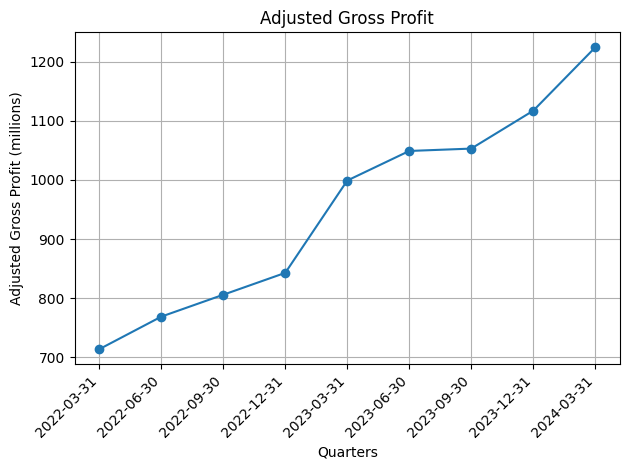

In [19]:
# plot of adj_gross_profit_df
plt.plot(adj_gross_profit_df['date'], adj_gross_profit_df['adjusted_gross_profit'],marker='o')
plt.title("Adjusted Gross Profit")
plt.xlabel("Quarters")
plt.ylabel("Adjusted Gross Profit (millions)")
plt.xticks(adj_gross_profit_df['date'], rotation=45, ha='right')  # Rotate for readability if needed
plt.grid()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Label the columns ds and y so that the syntax is recognized by Prophet
adj_gross_profit_df.columns = ["ds","y"]
adj_gross_profit_df

,ds,y
0,2022-03-31,714.0
1,2022-06-30,769.0
2,2022-09-30,806.0
3,2022-12-31,843.0
4,2023-03-31,999.0
5,2023-06-30,1049.0
6,2023-09-30,1053.0
7,2023-12-31,1117.0
8,2024-03-31,1224.0


In [ ]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [ ]:
# Fit the time-series model.
m.fit(adj_gross_profit_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1m9fd80/nzsjdjke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1m9fd80/ppe4p6mq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70473', 'data', 'file=/tmp/tmpi1m9fd80/nzsjdjke.json', 'init=/tmp/tmpi1m9fd80/ppe4p6mq.json', 'output', 'file=/tmp/tmpi1m9fd80/prophet_modelht6m0wuo/prophet_model-20240803024156.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:41:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:42:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 8 quarters (approx 2 years)
future_doordash_adj_gross = m.make_future_dataframe(periods=8, freq="q")

In [ ]:
# Make the predictions for the trend data using the DataFrame
forecast_doordash_adj_gross = m.predict(future_doordash_adj_gross)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


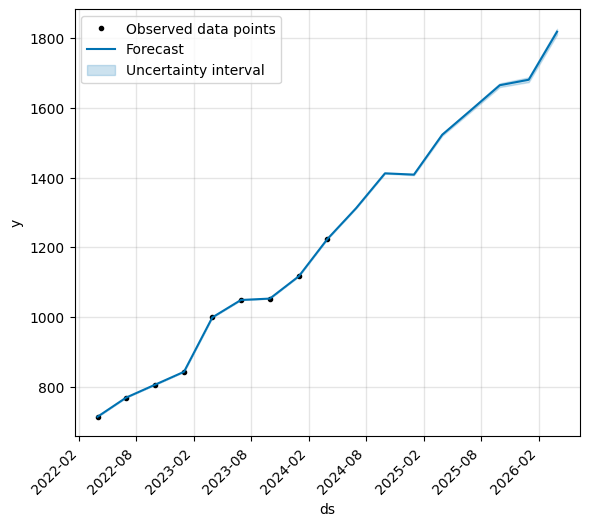

In [ ]:
# Plot the Prophet predictions for the adjusted gross profit data
m.plot(forecast_doordash_adj_gross, include_legend=True,figsize=(6,5))
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

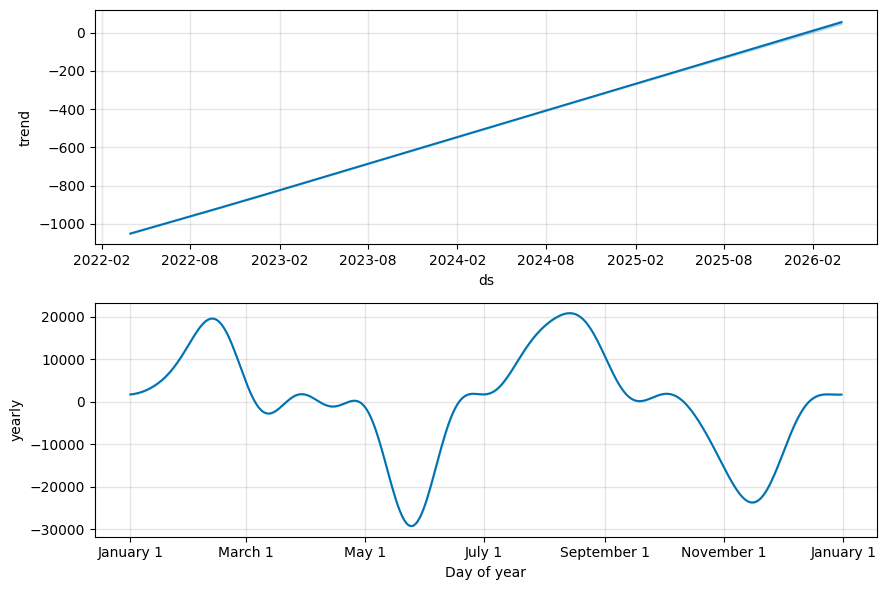

In [ ]:
# Reset the index in the forecast_doordash DataFrame
forecast_doordash_adj_gross = forecast_doordash_adj_gross.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_doordash DataFrame
fig1 = m.plot_components(forecast_doordash_adj_gross)

# This section is analyzing the Adjusted Gross Margin in Percent for each quarter from 2022 to the first quarter of 2024.

In [20]:
# Make a dataframe that only has the ending dates of the quarters along with the adjusted gross margin values
dates = ["2022-03-31","2022-06-30","2022-09-30","2022-12-31","2023-03-31","2023-06-30","2023-09-30","2023-12-31","2024-03-31"]
adj_gross_margin = df_doordash.iloc[6][1:]
adj_gross_margin_df = pd.DataFrame({"date":dates, "adjusted_gross_margin":adj_gross_margin})
adj_gross_margin_df

,date,adjusted_gross_margin
q1_2022,2022-03-31,0.49
q2_2022,2022-06-30,0.478
q3_2022,2022-09-30,0.474
q4_2022,2022-12-31,0.464
q1_2023,2023-03-31,0.491
q2_2023,2023-06-30,0.492
q3_2023,2023-09-30,0.487
q4_2023,2023-12-31,0.485
q1_2024,2024-03-31,0.487


In [21]:
# drop the index columns
adj_gross_margin_df.reset_index(drop=True, inplace=True)
adj_gross_margin_df

,date,adjusted_gross_margin
0,2022-03-31,0.49
1,2022-06-30,0.478
2,2022-09-30,0.474
3,2022-12-31,0.464
4,2023-03-31,0.491
5,2023-06-30,0.492
6,2023-09-30,0.487
7,2023-12-31,0.485
8,2024-03-31,0.487


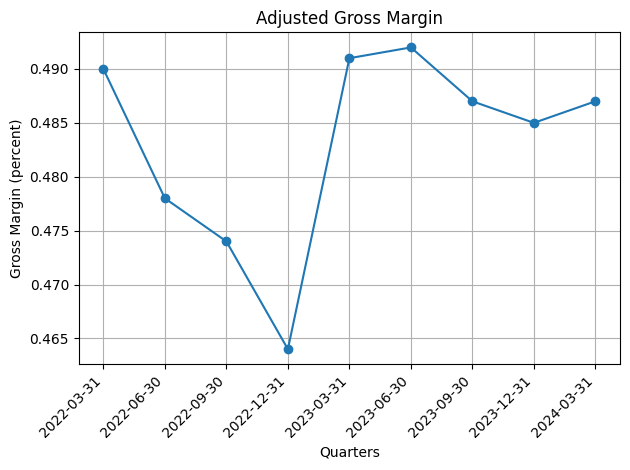

In [22]:
# plot of adj_gross_margin_df
plt.plot(adj_gross_margin_df['date'], adj_gross_margin_df['adjusted_gross_margin'],marker='o')
plt.title("Adjusted Gross Margin")
plt.xlabel("Quarters")
plt.ylabel("Gross Margin (percent)")
plt.xticks(adj_gross_margin_df['date'], rotation=45, ha='right')  # Rotate for readability if needed
plt.grid()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Label the columns ds and y so that the syntax is recognized by Prophet
adj_gross_margin_df.columns = ["ds","y"]
adj_gross_margin_df

,ds,y
0,2022-03-31,0.49
1,2022-06-30,0.478
2,2022-09-30,0.474
3,2022-12-31,0.464
4,2023-03-31,0.491
5,2023-06-30,0.492
6,2023-09-30,0.487
7,2023-12-31,0.485
8,2024-03-31,0.487


In [ ]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [ ]:
# Fit the time-series model.
m.fit(adj_gross_margin_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1m9fd80/bhua1gg4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1m9fd80/7yc38la0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53155', 'data', 'file=/tmp/tmpi1m9fd80/bhua1gg4.json', 'init=/tmp/tmpi1m9fd80/7yc38la0.json', 'output', 'file=/tmp/tmpi1m9fd80/prophet_modelo2dy8m21/prophet_model-20240803024452.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:44:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:44:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 8 quarters (approx 2 years)
future_doordash_adj_margin = m.make_future_dataframe(periods=8, freq="q")

In [ ]:
# Make the predictions for the trend data using the DataFrame
forecast_doordash_adj_margin = m.predict(future_doordash_adj_margin)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


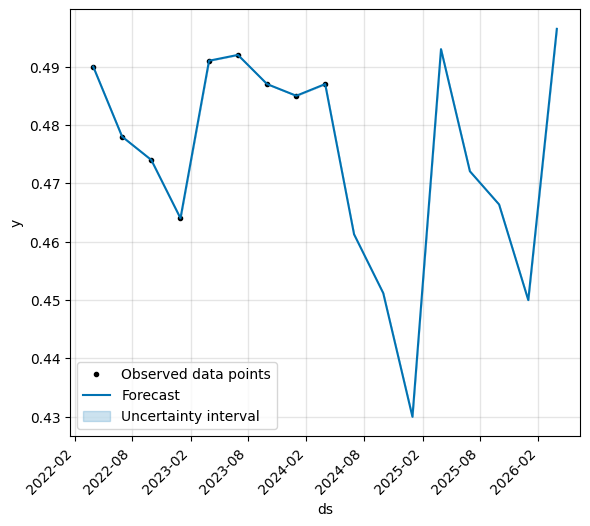

In [ ]:
# Plot the Prophet predictions for the adjusted gross margins data
m.plot(forecast_doordash_adj_margin, include_legend=True,figsize=(6,5))
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

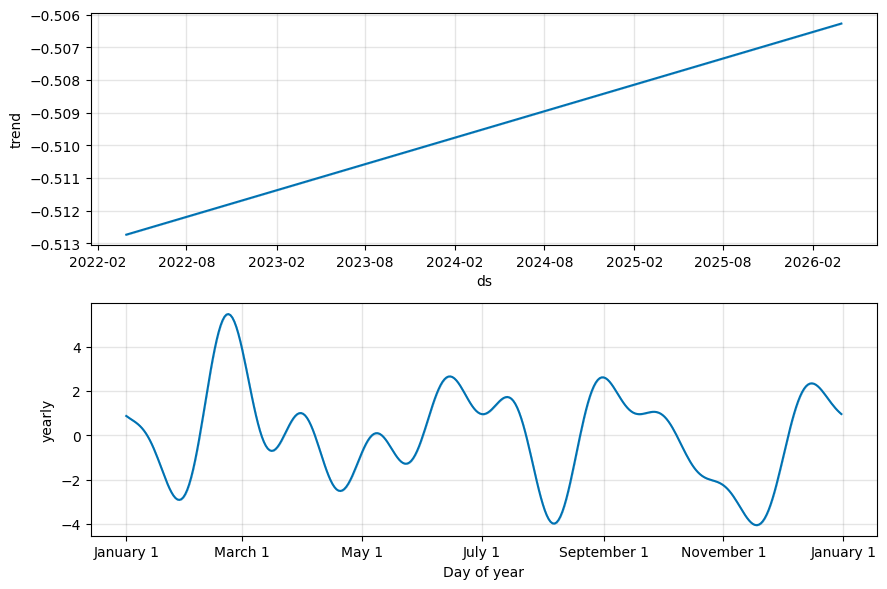

In [ ]:
# Reset the index in the forecast_doordash_adj_margin DataFrame
forecast_doordash_adj_margin = forecast_doordash_adj_margin.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_doordash_adj_margin DataFrame
fig3 = m.plot_components(forecast_doordash_adj_margin)

In [23]:
# Read in the csv data for the stock data
df_doordash_stock = pd.read_csv(
    "DASH-StockQuote-010122-033124.csv",
    index_col='Date',
    parse_dates=True
).dropna()

In [24]:
df_doordash_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,149.610001,150.164993,144.690002,145.339996,145.339996,2622300
2022-01-04,143.139999,143.860001,131.759995,135.910004,135.910004,5060300
2022-01-05,134.490005,139.389999,127.690002,127.970001,127.970001,3763800
2022-01-06,127.430000,140.750000,126.059998,137.279999,137.279999,7194700
2022-01-07,136.570007,138.869995,130.000000,132.270004,132.270004,3173200
...,...,...,...,...,...,...
2024-03-22,136.809998,137.750000,135.710007,137.240005,137.240005,1387100
2024-03-25,137.050003,138.899994,136.740005,137.820007,137.820007,2162800
2024-03-26,138.440002,140.929993,138.089996,140.259995,140.259995,3506600


In [26]:
# Create a list of the desired dates
dates = ["2022-03-31", "2022-06-30", "2022-09-30", "2022-12-31",
         "2023-03-31", "2023-06-30", "2023-09-30", "2023-12-31", "2024-03-28"]

# Convert the dates to datetime objects for proper indexing
dates = pd.to_datetime(dates)

# Create a new dataframe with only the desired dates
df_doordash_stock_qtr = df_doordash_stock[df_doordash_stock.index.isin(dates)]

# Display the new dataframe
print(df_doordash_stock_qtr)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-03-31  117.730003  120.319000  115.260002  117.190002  117.190002   
2022-06-30   66.320000   66.709999   60.520000   64.169998   64.169998   
2022-09-30   49.439999   51.435001   49.387001   49.450001   49.450001   
2023-03-31   61.830002   64.464996   61.400002   63.560001   63.560001   
2023-06-30   76.669998   77.800003   76.220001   76.419998   76.419998   
2024-03-28  139.149994  140.000000  137.600006  137.720001  137.720001   

             Volume  
Date                 
2022-03-31  3022100  
2022-06-30  5383300  
2022-09-30  3223200  
2023-03-31  4530400  
2023-06-30  2645100  
2024-03-28  3054700  


In [27]:
df_doordash_stockclose = df_doordash_stock_qtr.iloc[:,1]
df_doordash_stockclose

Date
2022-03-31    120.319000
2022-06-30     66.709999
2022-09-30     51.435001
2023-03-31     64.464996
2023-06-30     77.800003
2024-03-28    140.000000
Name: High, dtype: float64

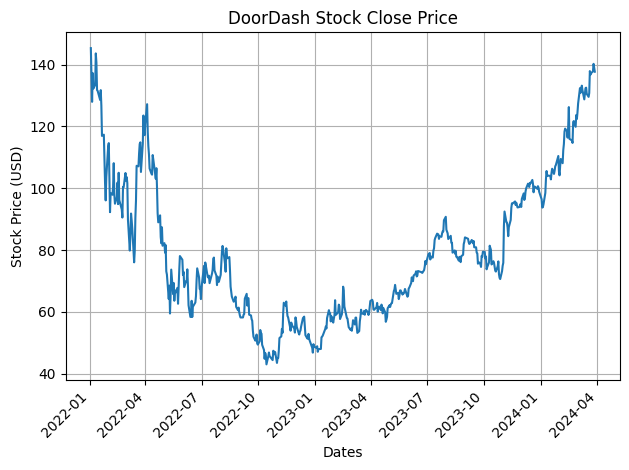

In [34]:
plt.plot(df_doordash_stock['Close'])
plt.title("DoorDash Stock Close Price")
plt.xlabel("Dates")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45, ha='right')  # Rotate for readability if needed
plt.grid()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

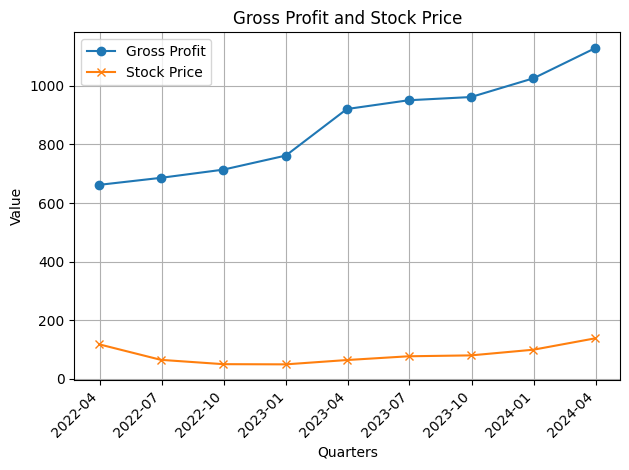

In [38]:
# Resample to quarterly and take the last value of each quarter
df_doordash_stock_quarterly = df_doordash_stock['Close'].resample('Q').last()

# Convert the index to a datetime column
df_doordash_stock_quarterly = df_doordash_stock_quarterly.reset_index()

# Rename the columns to match gross_profit_df
df_doordash_stock_quarterly.columns = ['ds', 'stock_price']  # Make sure 'ds' is used here

# Convert 'ds' to datetime objects
df_doordash_stock_quarterly['ds'] = pd.to_datetime(df_doordash_stock_quarterly['ds'])

gross_profit_df.columns = ["ds","y"]

# Ensure 'ds' in gross_profit_df is also datetime
gross_profit_df['ds'] = pd.to_datetime(gross_profit_df['ds'])

# Now you can plot both dataframes on the same plot
plt.plot(gross_profit_df['ds'], gross_profit_df['y'], marker='o', label='Gross Profit')

plt.plot(df_doordash_stock_quarterly['ds'], df_doordash_stock_quarterly['stock_price'], marker='x', label='Stock Price')

plt.title("Gross Profit and Stock Price")
plt.xlabel("Quarters")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-47-5a052d0c7f9d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


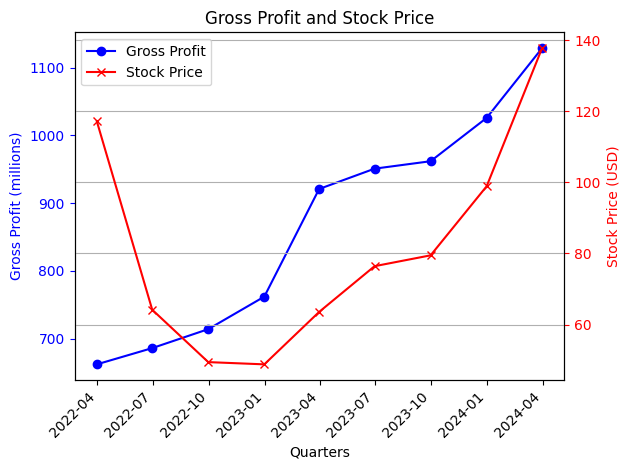

In [47]:
# Resample to quarterly and take the last value of each quarter
df_doordash_stock_quarterly = df_doordash_stock['Close'].resample('Q').last()

# Convert the index to a datetime column
df_doordash_stock_quarterly = df_doordash_stock_quarterly.reset_index()

# Rename the columns to match gross_profit_df
df_doordash_stock_quarterly.columns = ['ds', 'stock_price']  # Make sure 'ds' is used here

# Convert 'ds' to datetime objects
df_doordash_stock_quarterly['ds'] = pd.to_datetime(df_doordash_stock_quarterly['ds'])

gross_profit_df.columns = ["ds","y"]

# Ensure 'ds' in gross_profit_df is also datetime
gross_profit_df['ds'] = pd.to_datetime(gross_profit_df['ds'])

# Create the figure and the first y-axis
fig, ax1 = plt.subplots()

# Plot gross profit on the first y-axis
ax1.plot(gross_profit_df['ds'], gross_profit_df['y'], marker='o', color='blue', label='Gross Profit')
ax1.set_xlabel("Quarters")
ax1.set_ylabel("Gross Profit (millions)", color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot stock price on the second y-axis
ax2.plot(df_doordash_stock_quarterly['ds'], df_doordash_stock_quarterly['stock_price'], marker='x', color='red', label='Stock Price')
ax2.set_ylabel("Stock Price (USD)", color='red')
ax2.tick_params('y', colors='red')

plt.title("Gross Profit and Stock Price")
# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid()
plt.tight_layout()
plt.show()